# MARATONA BEHIND THE CODE 2020

## DESAFIO 7: Testes com AUTOML

# Parte 01. Importando as bibliotecas

In [1]:
# Pacotes padrao
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from autoviml.Auto_ViML import Auto_ViML

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/unimed/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/unimed/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/unimed/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/unimed/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/unimed/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/unimed/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to


Imported Auto_NLP version: 0.0.44.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)
Imported Auto_ViML version: 0.1.663. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            
To remove previous versions, perform 'pip uninstall autoviml'
NEW! Now Auto_ViML comes with a feature_engineering module using featuretools library!
To get the latest versio

# Parte 02. Importando os dados

In [2]:
treino = pd.read_csv(r'train_17015_v2.csv')
teste  = pd.read_csv(r'to_be_scored.csv')

# Removendo colunas que não serão utilizadas no treinamento
treino = treino.drop(['Tempo','Estação','Movimentação','LAT','LONG', 'row'], axis = 1)

# Removendo colunas que não serão utilizadas no treinamento
teste = teste.drop(['Tempo','Estação','Movimentação','LAT','LONG'], axis = 1)

print('Treino: ',treino.shape)
print('Teste: ',teste.shape)


Treino:  (17015, 9)
Teste:  (984, 8)


# Parte 03. AutoML

##############  D A T A   S E T  A N A L Y S I S  #######################
Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (17015, 9)
    Training Set Memory Usage = 1.17 MB
Test Set Shape = (984, 8)
    Test Set Memory Usage = 0.06 MB
Single_Label Target: ['TARGET']
Shuffling the data set before training
       Class  -> Counts -> Percent
      NORMAL:   11517  ->   67.7%
 REABASTECER:    5498  ->   32.3%
Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
String or Multi Class target: TARGET transformed as follows: {'NORMAL': 0, 'REABASTECER': 1}
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  8
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Numbe

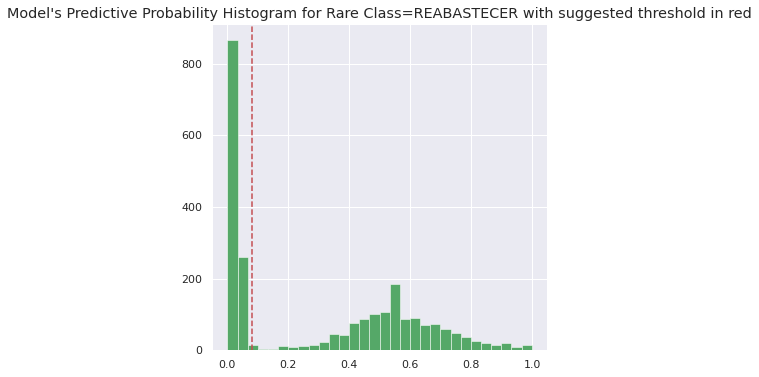

    Using threshold=0.5. However, 0.084 provides better F1=0.76 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 79.1%
Balanced Accuracy = 72.89% with Threshold = 0.50
Confusion Matrix:
[[1298  335]
 [ 269  529]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1633
           1       0.61      0.66      0.64       798

    accuracy                           0.75      2431
   macro avg       0.72      0.73      0.72      2431
weighted avg       0.76      0.75      0.75      2431

Balanced Accuracy = 84.28% with Threshold = 0.08
Confusion Matrix:
[[1134  499]
 [   7  791]]
              precision    recall  f1-score   support

           0       0.99      0.69      0.82      1633
           1       0.61      0.99      0.76       798

    accuracy                           0.79      2431
   macro avg       0.80      0.84  

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 84.220%
              precision    recall  f1-score   support

           0       0.99      0.69      0.82      1633
           1       0.61      0.99      0.76       798

    accuracy                           0.79      2431
   macro avg       0.80      0.84      0.79      2431
weighted avg       0.87      0.79      0.80      2431

[[1134  499]
 [   8  790]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


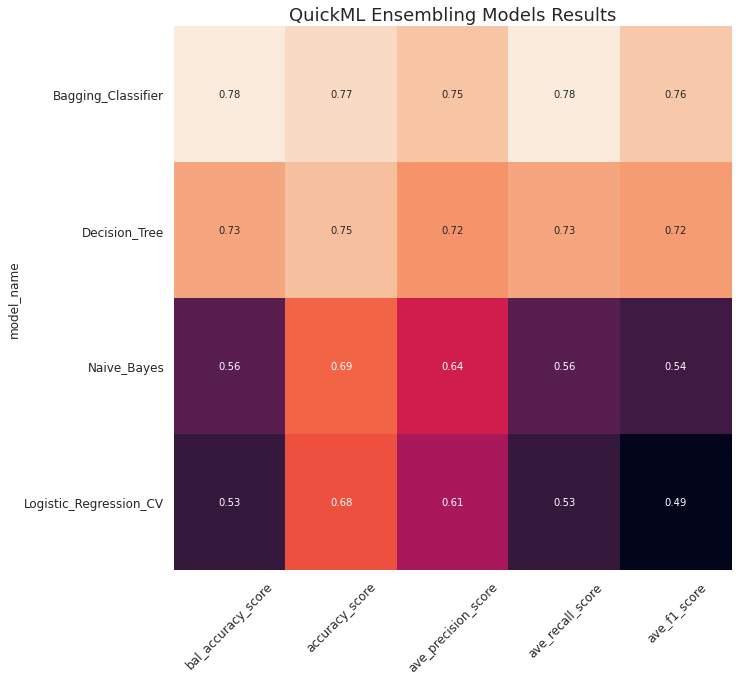

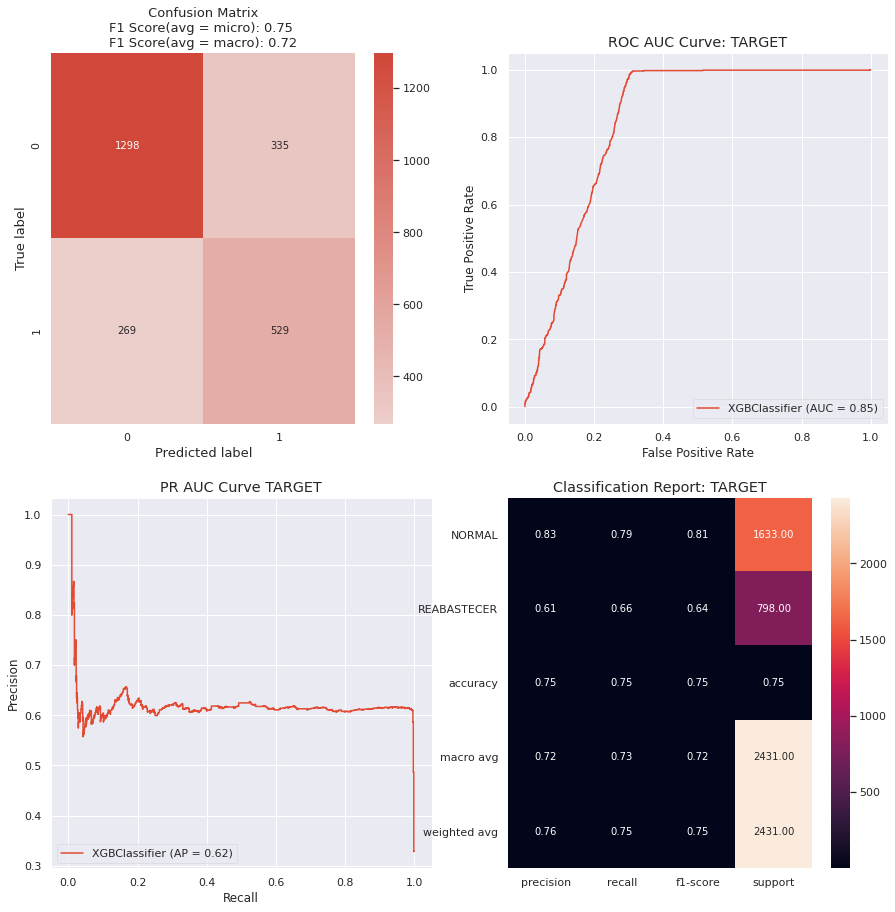

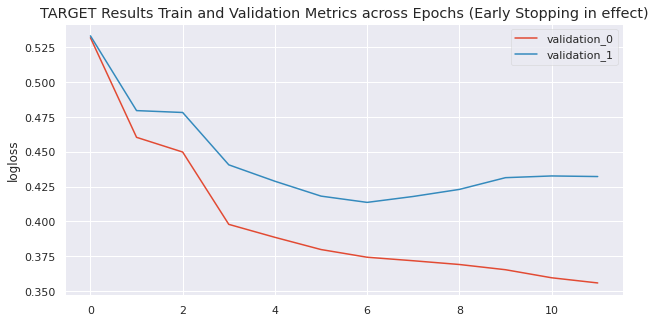

    Time taken for this Target (in seconds) = 13
Training model on complete Train data and Predicting using give Test Data...
    Binning_Flag set to False or there are no numeric vars in data set to be binned
Feature scaling for total 8 float and integer variables completed using MinMaxScaler()...
Actual Training time taken in seconds = 2
    Making test Data predictions using modified Threshold = 0.084
    Calculating weighted average ensemble of 5 classifiers
########################################################
Completed Ensemble predictions on held out data
Plotting Feature Importances to explain the output of model
Trying to plot SHAP values if SHAP is installed in this machine...
Could not plot SHAP values since SHAP is not installed or could not import SHAP in this machine
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken for this Target (in seconds) = 18
Writing Output files to disk...
    Saving predictions to ./TARGET/

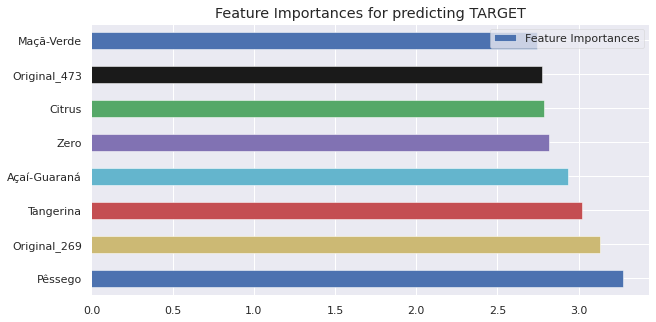

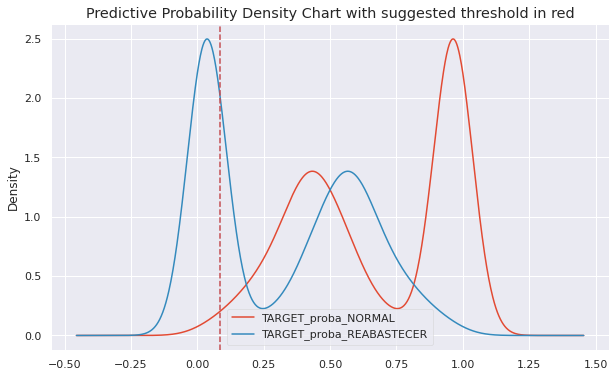

In [19]:
# XGBClassifier com SMOTE
model, features, trainm, testm = Auto_ViML(
    treino,
    'TARGET',
    teste,
    hyper_param="GS",
    feature_reduction=True,
    scoring_parameter="weighted_f1",
    KMeans_Featurizer=False,
    Boosting_Flag=True,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=3,
)